In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as si
import numpy.linalg as npla



import pandas as pd
from scipy.sparse.csc import csc_matrix

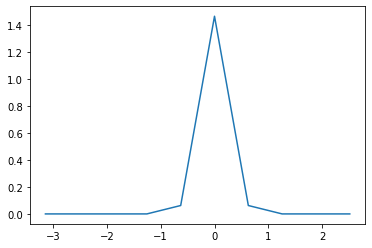

-1.6941026131382735e-18


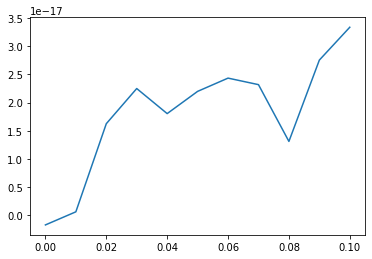

[ 0.00000000e+00+0.j  4.41145760e-22+0.j -5.25559645e-19+0.j
 -6.24804672e-20+0.j -3.92811322e-19+0.j -1.93727499e-18+0.j
 -5.45268774e-19+0.j  1.77288214e-18+0.j  2.74834977e-18+0.j
  2.28809573e-18+0.j  2.89284913e-19+0.j]


C:\Users\reddf\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


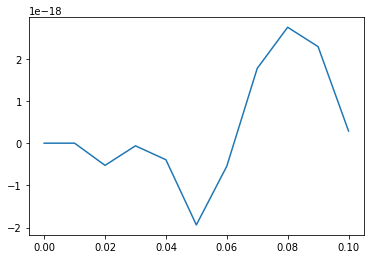

[-8.58013999e-10-1.01662825e-09j -1.50134156e-07+5.57912992e-08j
 -4.72334969e-06+2.75078303e-05j  1.93192772e-03+2.64358330e-03j
  2.33835524e-01+8.45039931e-02j  1.07383366e+00+5.61026388e-01j
  2.33835524e-01+8.45039931e-02j  1.93192772e-03+2.64358330e-03j
 -4.72334969e-06+2.75078303e-05j -1.50134156e-07+5.57912992e-08j]


In [2]:
#Wigner/Husini function implementation
#Particle on ring Dimensionless


#variables
Omeg0=1.0
Omeg1=1.0
eps=0.0
ntild=10#ntild = 1 is quantum, ntild>>1 is classical
dt=0.01
nsteps=10
isteps=10

t0=0
theta0=0#+0.1
thetamin=-np.pi
thetamax=np.pi
k=1j

#dependent variables
dtheta=(2*thetamax)/isteps
sigma=0.5

#initial arrays 
theta=np.zeros(isteps)
drv=np.zeros(nsteps+1)
t=np.zeros(nsteps+1)
   
for n in range(nsteps+1):#t,drv array, drv is drive force
    tn=t0+(n)*dt
    t[n]=tn
    drvn=np.cos(Omeg1*tn)
    drv[n]=drvn

T=np.zeros(isteps,np.complex)#wave packet array

for i in range(0,isteps):#theta,initial wave packet array T
    thetai=thetamin+(i)*dtheta
    theta[i]=thetai
    Ti=np.exp((-0.0*k*thetai)+(-1)*((thetai-theta0)**2)/(sigma)**2)
    T[i]=Ti
    
#probibility here, to normalize
Total=np.sum(np.abs(T)**2)*dtheta
T=T/(np.sqrt(Total))
#make array of arrays of T
Tn=[]
Tn.append(T)

#definitions of coeffients
def a(drv,theta):
    a1=((1/(ntild*2*2*(dtheta)**2))-((k*eps*(Omeg0/Omeg1)*drv[n])/(dtheta)))
    return a1
def b(drv,theta):
    b1=((k/(Omeg0*dt))+(1/(ntild*2*(dtheta)**2))+((eps**2)/2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n])**2/4)-(ntild*np.cos(theta)/2))#cos has flipped signs, fix this and correct the potential
    return b1 
def c(drv,theta):
    c1=((1/(ntild*2*2*(dtheta)**2))+((k*eps*(Omeg0/Omeg1)*drv[n])/(dtheta)))
    return c1

def a_1(drv,theta):
    a_11=((1/(ntild*2*2*(dtheta)**2))-((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dtheta)))
    return a_11
def b_1(drv,theta):
    b_11=((k/(Omeg0*dt))-(1/(ntild*2*(dtheta)**2))-((eps**2)/2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n+1])**2/4)+(ntild*np.cos(theta)/2))#cos has flipped signs, fix this and correct the potential
    return b_11
def c_1(drv,theta):
    c_11=((1/(ntild*2*2*(dtheta)**2))+((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dtheta)))
    return c_11

def CrankNicolson(T,n):#Crank nicolson solver with periodic boundary conditions
    RHS=np.zeros(isteps,np.complex)#RHS
    for i in range(-1,isteps-1):
        temp1=-a(drv,theta[i])
        temp2=b(drv,theta[i])
        temp3=-c(drv,theta[i])
        RHS[i]=temp1*T[i+1]+temp2*T[i]+temp3*T[i-1]
    D=np.matrix(RHS).T#made matrix for the RHS
    d=np.zeros((isteps,isteps),np.complex)#LHS
    for i in range(-1,isteps-1):
        d[i,i]=b_1(drv,theta[i])
        d[i,i+1]=a_1(drv,theta[i])
        d[i,i-1]=c_1(drv,theta[i])
    d=np.matrix(d)#made matrix for LHS
    I=npla.inv(d)#matrix inversion using linear algebra 
    T1=I*D
    T1=np.array(T1.T)[0]#add to array of T
    return T1

#plt.plot(theta,np.real(T))# plots initial condition
#Run for all t
for n in range(nsteps):#Plots real parts                                                                  
    T=CrankNicolson(T,n)
    Tn.append(T)
 #   plt.plot(theta,np.real(T))
    
#plt.show() 

#for T in Tn:#Plots imaginary parts
  #  plt.plot(theta,np.imag(T))

#plt.show()

#for T in Tn:#plots overall average
   # plt.plot(theta,np.abs(T)**2)
   #print(np.sum(np.abs(T)**2)*dtheta)#checking for unitarity

for n in range(0,nsteps,10):
    plt.plot(theta,np.abs(Tn[n])**2)

plt.show()

#Expecatation values

def position(theta,T):#calculates expectation value
    TA=0.
    for i in range(isteps):
        TA=TA+theta[i]*(np.abs(T[i])**2)*dtheta
    return TA

xbar=np.zeros(nsteps+1)
for n in range(nsteps+1):
    xbar[n]=np.real(position(theta,Tn[n]))
    
print(xbar[0])
plt.plot(t,xbar)
plt.show()

#angular momentum value, this works as long as Omeg0=1, which it does
Exp_momentum=np.zeros((nsteps+1,2),np.complex)
def momentum(T):#calculates expectation value
    P=0.
    for i in range(-1,isteps-1):
        P=P+(1)*(-k)*(Omeg0/ntild)*np.conj(T[i])*((T[i+1]-T[i-1])/(2*dtheta))*dtheta
    return(P)

pbar=np.zeros((nsteps+1),np.complex)
#
for n in range(nsteps+1):
    pbar[n]=np.real(momentum(Tn[n]))
    Exp_momentum[n,0]=t[n]#time
    Exp_momentum[n,1]=momentum(Tn[n])#expectation value of momentum

Exp_momentum=np.matrix(Exp_momentum)#table showing time and expectation value
print(pbar)
plt.plot(t,pbar)
plt.show()

print(T)

In [3]:
#husini function

Omegamax=max(pbar)
Omegamin=min(pbar)
Omega0=0
msteps=len(theta)
domega= (2*Omegamin)/msteps
dtheta= 1000000
dx=0.001

#need to fix the calcualtion of omega periodic boundary conditions

#T=np.zeros(isteps)
#for i in range(isteps):
#    Ti=np.cos(theta[i])
#    T[i]=Ti
print(T)
Omega=np.zeros(msteps,np.complex)#calculation of omega
for m in range(0,msteps):
    Omegam=Omega0+(m)*domega
    Omega[m]=Omegam
    Omega[m]=((np.real(Omega[m])+np.real(Omegamin))%(2*np.real(Omegamin))-np.real(Omegamin))#periodic boundary conditions

print(theta0)
print(Omega0)

Omega,theta=np.meshgrid(Omega,theta)
print(len(Omega))
print(len(theta))

x=np.linspace(-np.pi,np.pi,len(Omega))

print(T.shape)
print(x.shape)

print(Omega[1,1])

I=[]
for m in range(msteps):
    for i in range(isteps):
        I=T[i]*np.exp((k*ntild*Omega[m,i]*x)-(((theta[m,i]-x[m])**2)/(4*(dtheta**4))))*dx
print(I.shape)
#Husini function 
#def I(Omega,theta,T):
#     I=0.
    # for x in range(int(-np.pi),int(np.pi)):
    #    I=T*dx#*np.exp((k*ntild*Omega*x)-(((theta-x)**2)/(4*(dtheta**4))))*dx
    #print(I)
    #return I#this is for simplicty to define the I function
#print(theta[m,i])
    
Hus=np.zeros((msteps+1,isteps+1),np.complex)#make a 2d array with lin space
# all wrong
#for n in range(nsteps):
for m in range(msteps+1):
    for i in range(isteps+1):
        Hus[m,i]=si.simps(I[m,i,:],x)#add bounds to this -pi, pi
print(Hus.shape)
#print(len(T))
#print(np.abs(T)**2)

print(Omega)
print(theta)
print(np.abs(Hus)**2)


plt.contour(Omega,theta,np.abs(Hus)**2)
plt.show
#fix this, we are getting an operand error because T and omega have diffrent shapes... figure out that loop



[-8.58013999e-10-1.01662825e-09j -1.50134156e-07+5.57912992e-08j
 -4.72334969e-06+2.75078303e-05j  1.93192772e-03+2.64358330e-03j
  2.33835524e-01+8.45039931e-02j  1.07383366e+00+5.61026388e-01j
  2.33835524e-01+8.45039931e-02j  1.93192772e-03+2.64358330e-03j
 -4.72334969e-06+2.75078303e-05j -1.50134156e-07+5.57912992e-08j]
0
0
10
10
(10,)
(10,)
(-3.8745499715550285e-19+0j)
(10,)


IndexError: too many indices for array